<a href="https://colab.research.google.com/github/Alfonso-Jesus-Garcia-Moya/RECONOCIMIENTO-DE-FORMAS-Y-APRENDIZAJE-COMPUTACIONAL/blob/main/SEMANA%209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SEMANA 9
Tema 4. ILUMINACIÓN

4.1. Importancia de la iluminación en visión por computadora.

4.2. Problemas relacionados con la iluminación.

4.3. Preprocesamiento de imágenes.

4.4. Aumento de datos específico para la iluminación.

# Tema 4: Iluminación y Análisis Visual en Imágenes

## Introducción

En esta clase exploraremos cómo la iluminación afecta el análisis de imágenes y la preparación de datos para modelos de aprendizaje automático y visión por computadora. Comprender la influencia de la luz en las imágenes es fundamental, ya que variaciones de iluminación pueden afectar la calidad de las predicciones y la generalización de los modelos.

Aprenderemos a aplicar técnicas de **preprocesamiento de iluminación**, incluyendo ajustes de brillo y contraste, para mejorar la uniformidad de los datos y reducir sesgos introducidos por condiciones de captura. Además, introduciremos métodos de **reducción de dimensionalidad** como PCA y UMAP, que permiten visualizar grandes conjuntos de imágenes en un espacio reducido, manteniendo patrones relevantes.

Durante la sesión, los estudiantes:

- Conocerán la importancia de la iluminación en visión por computadora y los problemas que puede generar.
- Aplicarán transformaciones de iluminación a imágenes de un dataset real (Stanford Dogs Dataset).
- Explorararán técnicas de reducción de dimensionalidad para visualizar y entender la distribución de las imágenes procesadas.
- Relacionarán los efectos del preprocesamiento con la interpretación de resultados y la preparación de datos para modelos de clasificación o clustering.

Esta clase combina teoría y práctica, utilizando un conjunto de imágenes real para que los estudiantes puedan **observar directamente cómo las variaciones de iluminación afectan la representación de los datos** y cómo estas técnicas contribuyen a una mejor preparación para tareas de aprendizaje supervisado y no supervisado.


# Montaje de Google Drive y Preparación del Dataset

## Objetivo

Antes de trabajar con imágenes para preprocesamiento y análisis visual, necesitamos acceder al dataset almacenado en Google Drive. Esto nos permite manipular archivos grandes directamente desde Colab sin ocupar espacio local adicional.

En esta sección, se realizan los siguientes pasos:

1. **Montar Google Drive**:  
   Permite que Colab acceda a los archivos de tu cuenta de Drive mediante `/content/drive`.

2. **Verificar la existencia del archivo ZIP**:  
   Antes de descomprimir o procesar, comprobamos que el dataset (`perros.zip`) se encuentra en la ruta correcta.

3. **Descomprimir y organizar las imágenes**:  
   Una vez localizado el ZIP, se copia a la carpeta de trabajo en Colab y se descomprime, dejando los archivos listos para procesamiento.

## Código de ejemplo


In [ ]:
from google.colab import drive
from sklearn.decomposition import PCA
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/A105 RECONOCIMIENTO DE FORMAS Y APRENDIZAJE COMPUTACIONAL /Clases/Semana 9/perros.zip"


'/content/drive/MyDrive/A105 RECONOCIMIENTO DE FORMAS Y APRENDIZAJE COMPUTACIONAL /Clases/Semana 9/perros.zip'


In [ ]:
import zipfile
import os

zip_drive_path = "/content/drive/MyDrive/A105 RECONOCIMIENTO DE FORMAS Y APRENDIZAJE COMPUTACIONAL /Clases/Semana 9/perros.zip"
dataset_extract_path = "/content/stanford_dogs"

# Crear carpeta de extracción
os.makedirs(dataset_extract_path, exist_ok=True)

# Descomprimir directamente desde Drive
with zipfile.ZipFile(zip_drive_path, 'r') as zip_ref:
    zip_ref.extractall(dataset_extract_path)

print("Archivos extraídos en:", dataset_extract_path)
!ls "/content/stanford_dogs"


Archivos extraídos en: /content/stanford_dogs
annotations  images


# Visualización de Imágenes Aleatorias — Stanford Dogs Dataset

## Objetivo

Antes de aplicar cualquier técnica de preprocesamiento o aumento de datos, es importante familiarizarse con el dataset. En esta sección, seleccionamos aleatoriamente **10 imágenes** de distintas razas de perros y las mostramos en un **grid** para tener una visión general del contenido.

## Código de ejemplo


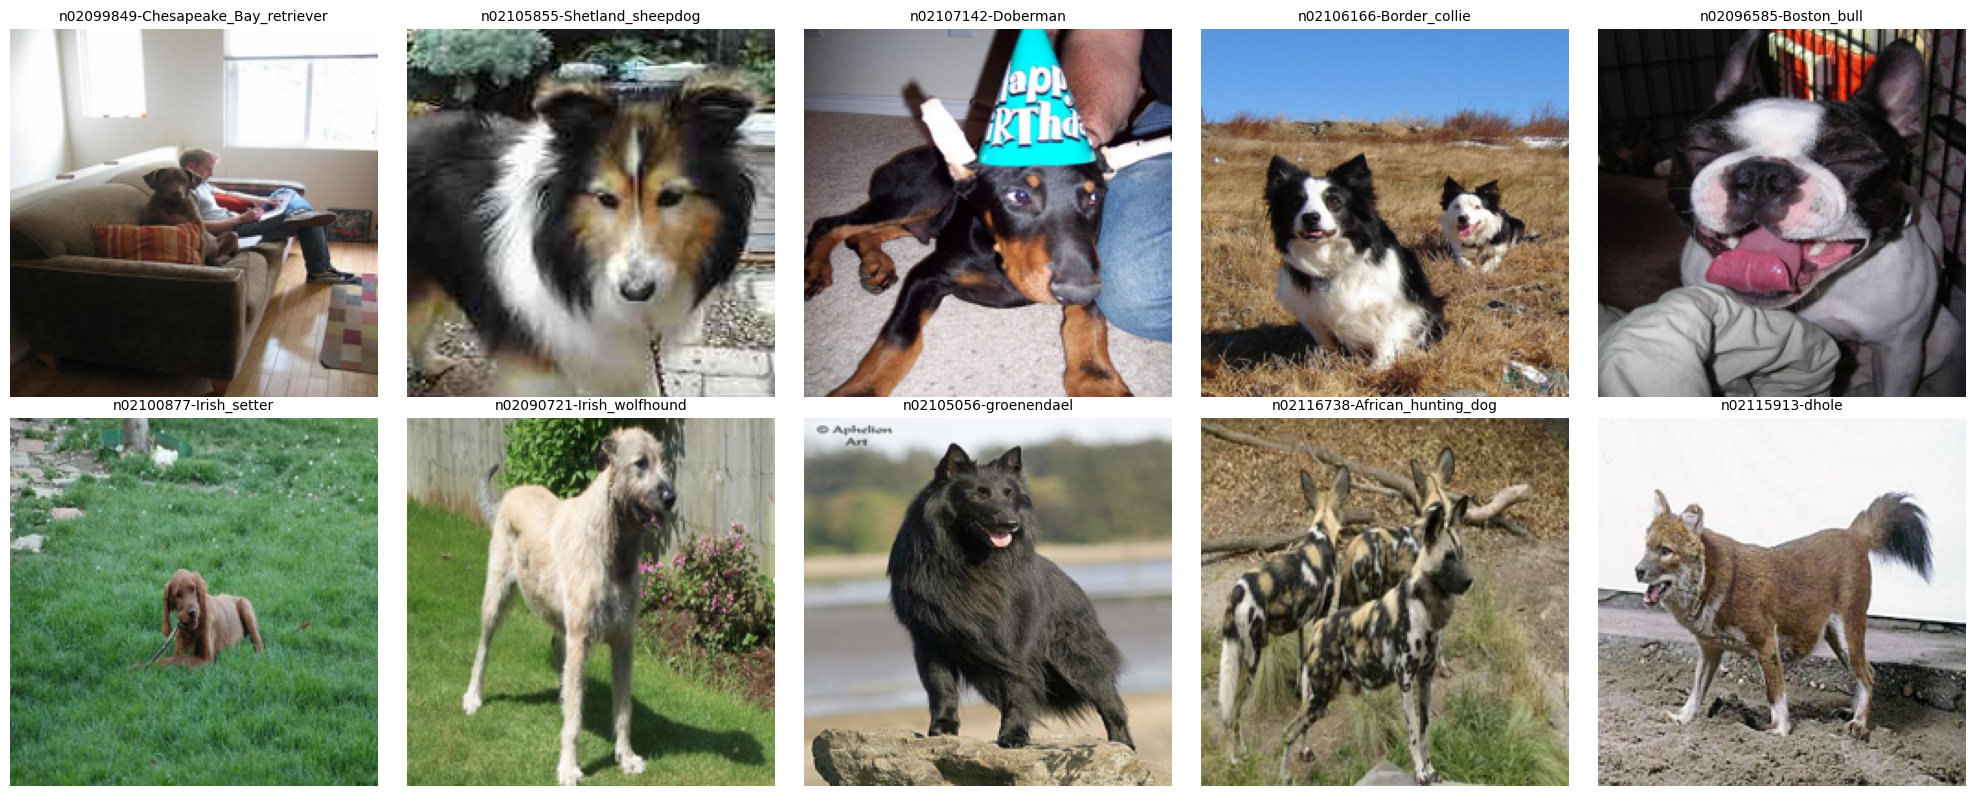

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Carpeta de imágenes
images_path = "/content/stanford_dogs/images/Images"

# Listar todas las subcarpetas (razas)
breed_folders = [f for f in os.listdir(images_path) if os.path.isdir(os.path.join(images_path, f))]

# Seleccionar 10 imágenes aleatorias
random_images = []
for _ in range(10):
    breed = random.choice(breed_folders)
    breed_path = os.path.join(images_path, breed)
    img_file = random.choice(os.listdir(breed_path))
    img_path = os.path.join(breed_path, img_file)
    random_images.append((img_path, breed))

# Crear figura
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for ax, (img_path, breed) in zip(axes.flatten(), random_images):
    img = Image.open(img_path)
    img = img.resize((200, 200))  # redimensionar para que se vea uniforme
    ax.imshow(img)
    ax.set_title(breed, fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()


# Preprocesamiento de Iluminación — Variaciones de Brillo y Contraste

## Objetivo

Antes de entrenar modelos de visión por computadora, es crucial entender cómo la iluminación afecta a las imágenes. Esta sección muestra cómo se pueden aplicar **variaciones de brillo y contraste** para mejorar la robustez de los modelos y simular diferentes condiciones de iluminación.

## Concepto

- **Brillo (`beta`)**: Ajusta la luminosidad global de la imagen. Valores positivos la aclaran y valores negativos la oscurecen.
- **Contraste (`alpha`)**: Escala la diferencia entre los tonos claros y oscuros. Valores mayores que 1 aumentan el contraste, mientras que valores menores lo reducen.

## Ejemplo práctico

- Se selecciona una imagen aleatoria de una raza de perro.
- Se generan **6 versiones** de la imagen con distintas combinaciones de brillo y contraste:
  1. Original
  2. Contraste alto
  3. Contraste bajo
  4. Brillo alto
  5. Brillo bajo
  6. Contraste y brillo alto

- Las imágenes se muestran en un **grid de 2x3**, permitiendo observar visualmente el efecto de cada transformación.

## Beneficios

- Permite a los modelos aprender a **generalizar** frente a variaciones de iluminación.
- Ayuda a **identificar problemas de iluminación** en el dataset que podrían afectar el rendimiento.
- Es un paso preliminar antes de aplicar **técnicas de aumento de datos** o **normalización de imágenes**.

> 🔹 Esta visualización es esencial para que los estudiantes comprendan cómo los cambios de iluminación afectan la apariencia de los objetos y cómo prepararlos para un análisis más robusto.


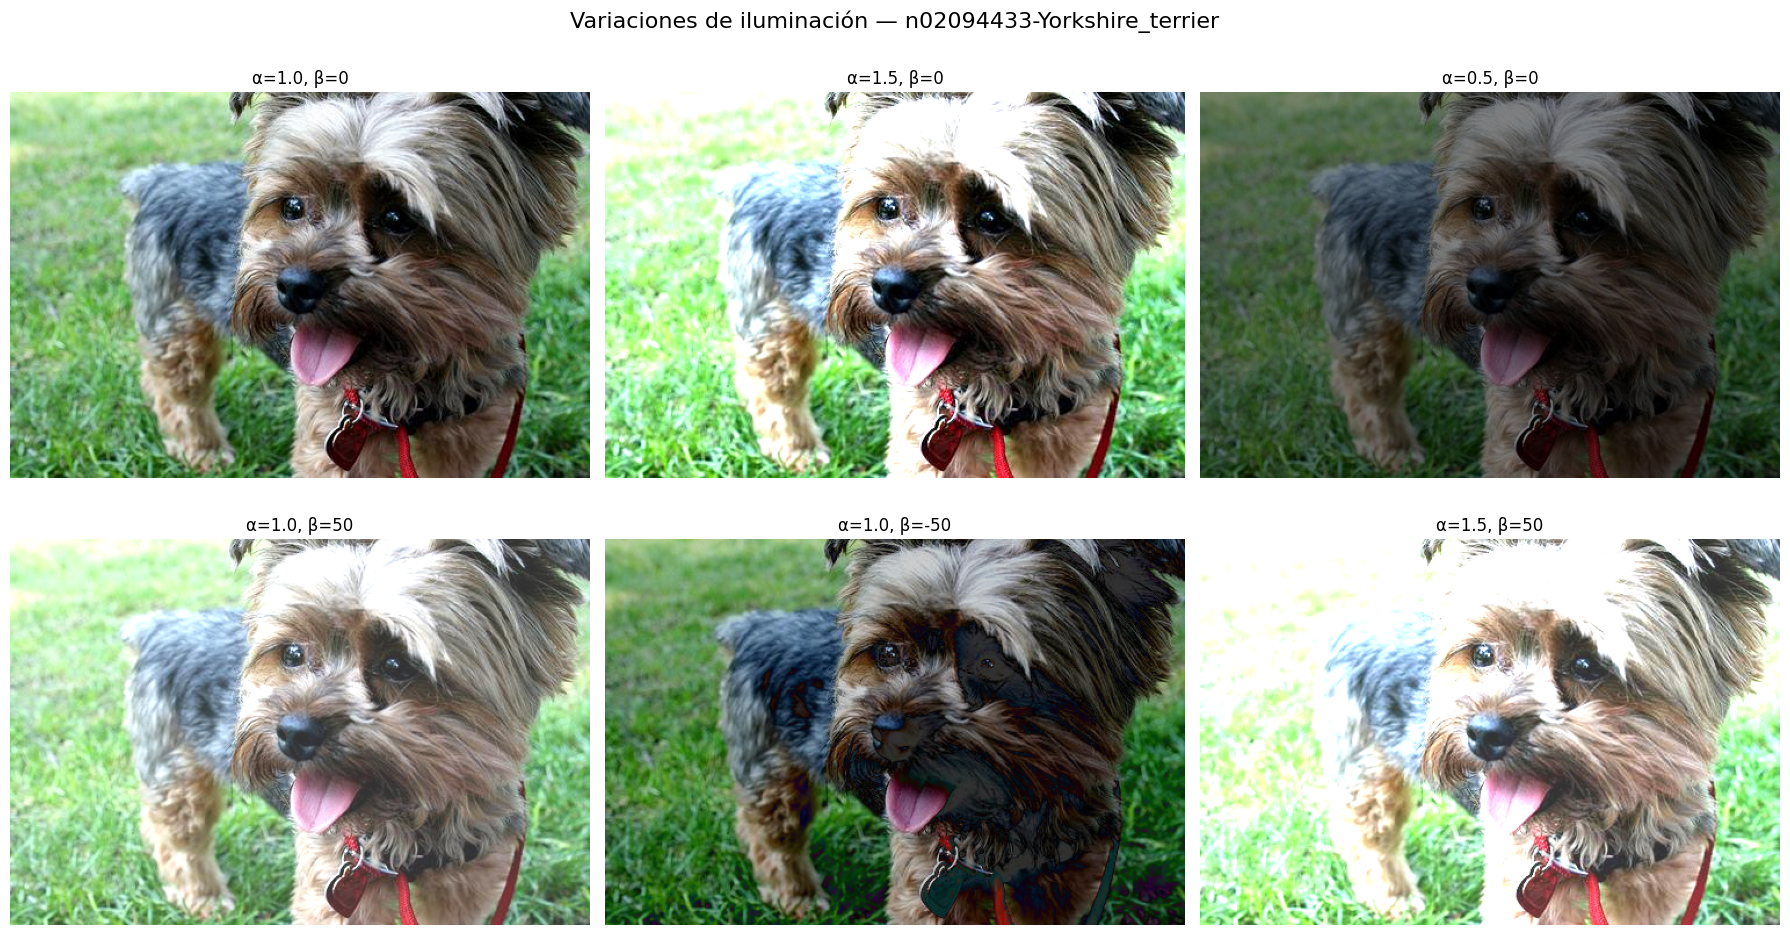

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os

# Carpeta de imágenes
images_path = "/content/stanford_dogs/images/Images"

# Listar subcarpetas (razas)
breed_folders = [f for f in os.listdir(images_path) if os.path.isdir(os.path.join(images_path, f))]

# Seleccionar una imagen aleatoria
breed = random.choice(breed_folders)
breed_path = os.path.join(images_path, breed)
img_file = random.choice(os.listdir(breed_path))
img_path = os.path.join(breed_path, img_file)

# Cargar imagen
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Definir variaciones de brillo y contraste
variations = [
    (1.0, 0),   # Original
    (1.5, 0),   # Contraste alto
    (0.5, 0),   # Contraste bajo
    (1.0, 50),  # Brillo alto
    (1.0, -50), # Brillo bajo
    (1.5, 50)   # Contraste y brillo alto
]

# Graficar todas las variaciones
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for ax, (alpha, beta) in zip(axes, variations):
    img_adjusted = cv2.convertScaleAbs(img_rgb, alpha=alpha, beta=beta)
    title = f"α={alpha}, β={beta}"
    ax.imshow(img_adjusted)
    ax.set_title(title, fontsize=12)
    ax.axis('off')

plt.suptitle(f"Variaciones de iluminación — {breed}", fontsize=16)
plt.tight_layout()
plt.show()


# Transformación Lineal de Píxeles — Ajuste de Brillo y Contraste

En procesamiento de imágenes, podemos realizar un **ajuste lineal de brillo y contraste** de cada píxel mediante la siguiente operación:

$$
\text{pixel_nuevo} = \operatorname{clip}(\alpha \cdot \text{pixel_original} + \beta, 0, 255)
$$




### Descripción de los parámetros:

- **Multiplicación por α (alpha):**  
  Escala el valor de cada píxel, aumentando o disminuyendo el contraste. Matemáticamente, esto es equivalente a multiplicar toda la matriz de la imagen por un escalar α.

- **Suma de β (beta):**  
  Ajusta el brillo sumando un valor constante a todos los píxeles de la matriz.

- **Clip a [0,255]:**  
  Garantiza que los valores resultantes se mantengan dentro del rango válido para imágenes de 8 bits.

### Concepto de matriz:

Si representamos la imagen como una **matriz de tamaño H×W×3** (altura × ancho × canales RGB), la operación se realiza **elemento a elemento** sobre la matriz completa:

$$
\mathbf{I}_{\text{ajustada}} = \text{clip}(\alpha \cdot \mathbf{I}_{\text{original}} + \beta)
$$

- Cada canal de color se multiplica por α y se suma β de forma vectorizada.
- Es una **multiplicación escalar de matriz más una suma de sesgo**, operación muy eficiente y paralelizable en librerías como OpenCV.




---

## Preprocesamiento de Iluminación en Imágenes de Perros

En esta sección, se muestran varias técnicas de **preprocesamiento de iluminación** aplicadas a imágenes del **Stanford Dogs Dataset**, con el objetivo de preparar las imágenes para modelos de visión por computadora y mejorar la robustez ante cambios de brillo y contraste.

### 1. Carga y mostrar la imagen original
- Se selecciona una imagen **aleatoria** de una raza específica.
- Se convierte a **RGB** para compatibilidad con `matplotlib`.
- La imagen original sirve como referencia para comparar los efectos de los preprocesamientos.

### 2. Brillo y Contraste (α, β)
- `α` (alpha): multiplica cada píxel para ajustar el **contraste**.
- `β` (beta): suma un valor constante a cada píxel para ajustar el **brillo**.
- La operación se realiza usando `cv2.convertScaleAbs(img, alpha, beta)`.
- Esto permite generar variantes más claras u oscuras de la imagen, útil para entrenamiento de modelos robustos.

### 3. Normalización de Intensidad
- Los valores de los píxeles se **escalan a [0,1]** dividiendo por 255.
- Es un paso común antes de alimentar redes neuronales, ya que facilita la **convergencia** y estabiliza el entrenamiento.

### 4. Ecualización de Histograma
- Convierte la imagen a **grayscale** y aplica `cv2.equalizeHist()`.
- Redistribuye los niveles de intensidad para mejorar el **contraste global**.
- Útil cuando hay zonas oscuras o claras dominantes en la imagen.

### 5. CLAHE (Contrast Limited Adaptive Histogram Equalization)
- Variante adaptativa de la ecualización de histograma.
- Divide la imagen en **tiles** (porción rectangular o cuadrada de una imagen), aplica ecualización limitada por `clipLimit`, y luego mezcla los tiles.
- Mejora el contraste local sin amplificar demasiado el ruido.

### 6. Blur (Desenfoque Gaussiano)
- Aplica `cv2.GaussianBlur()` para suavizar la imagen.
- El desenfoque puede reducir **ruido** y pequeñas variaciones de iluminación que no son relevantes para el modelo.

### 7. Presentación de la imagen
- Se muestran todas las versiones en un **grid 2x3** para comparación.
- Las imágenes **grayscale** se muestran con `cmap='gray'`.
- Esto permite **comparar de manera intuitiva** los efectos de cada técnica y decidir cuál aplicar según la tarea de visión por computadora.

---

🔹 **Nota para los estudiantes**: Estas técnicas no cambian la estructura general de la imagen, solo **modifican la iluminación, el contraste o el ruido**, ayudando a los modelos a generalizar mejor a diferentes condiciones de captura de imágenes.



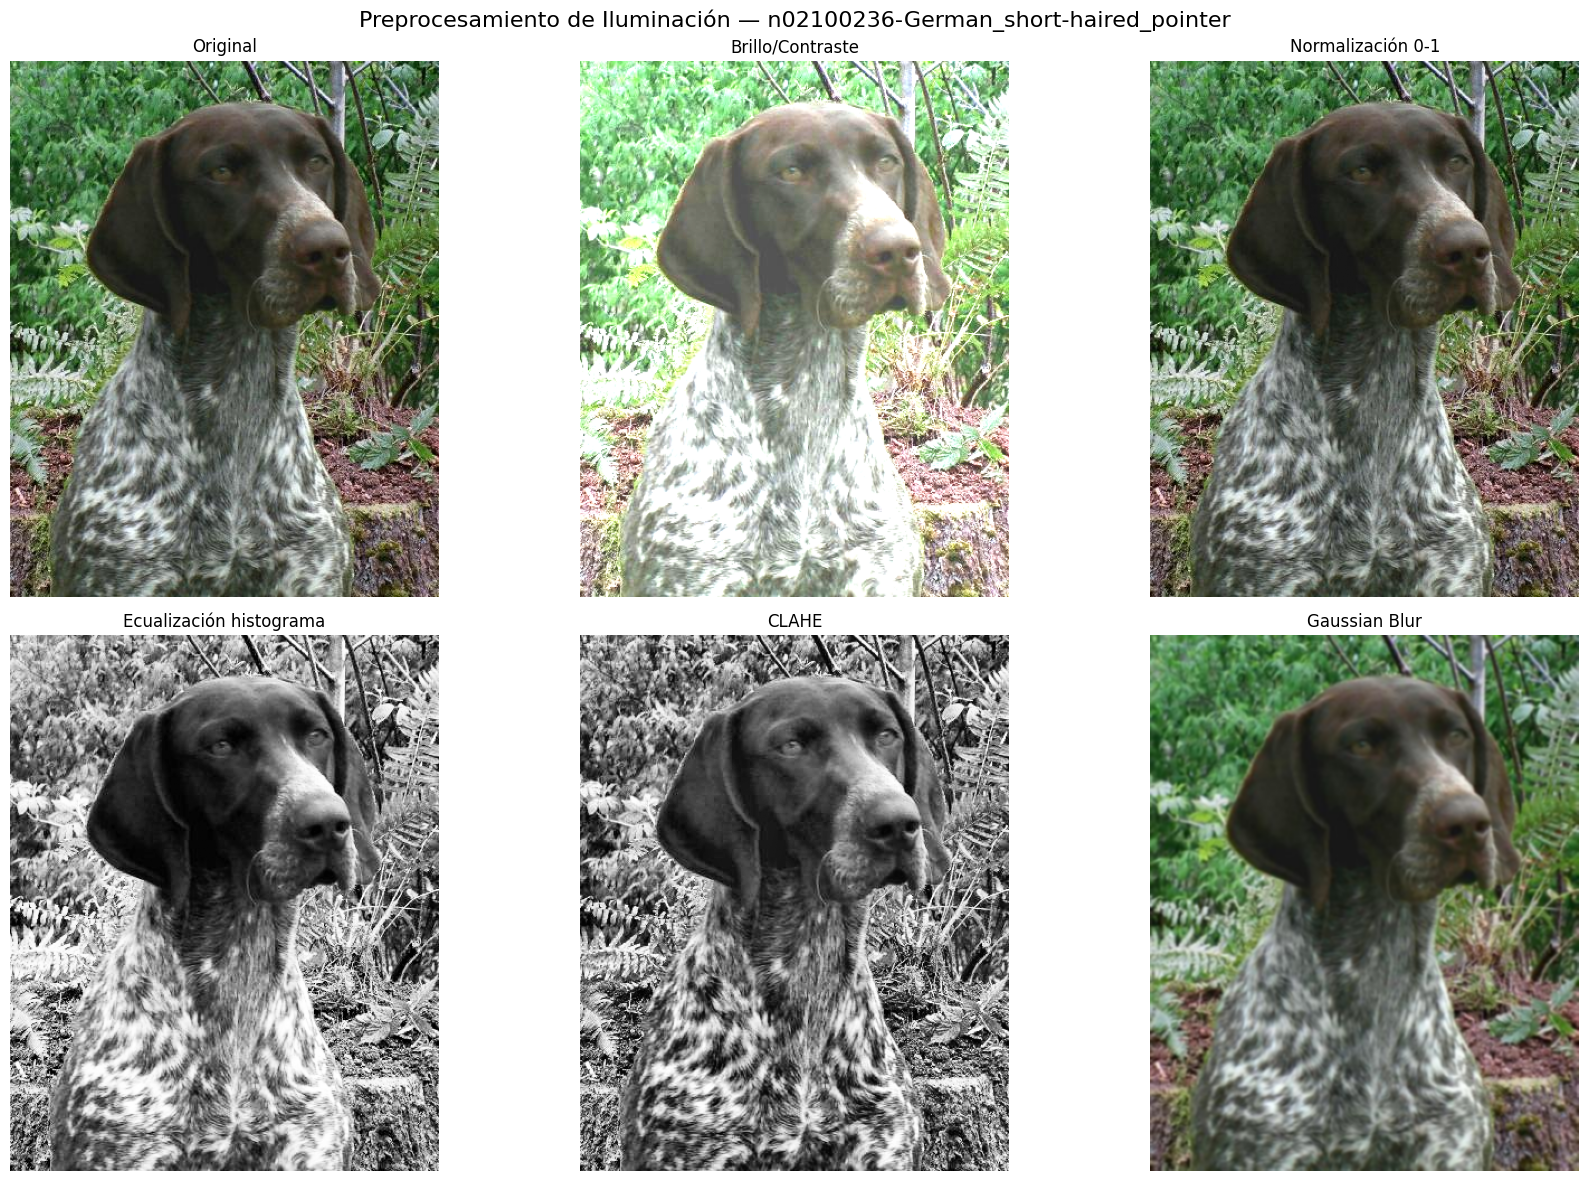

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from PIL import Image

# Carpeta de imágenes
images_path = "/content/stanford_dogs/images/Images"

# Listar subcarpetas (razas)
breed_folders = [f for f in os.listdir(images_path) if os.path.isdir(os.path.join(images_path, f))]

# Seleccionar una imagen aleatoria
breed = random.choice(breed_folders)
breed_path = os.path.join(images_path, breed)
img_file = random.choice(os.listdir(breed_path))
img_path = os.path.join(breed_path, img_file)

# Cargar imagen
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # ahora está en RGB de BGR a RGB

# -------------------------------
# 1) Original
# -------------------------------
img_original = img_rgb.copy()

# -------------------------------
# 2) Brillo y contraste
# -------------------------------
alpha, beta = 1.5, 50
img_bc = cv2.convertScaleAbs(img_rgb, alpha=alpha, beta=beta)

# -------------------------------
# 3) Normalización intensidad (0-1)
# -------------------------------
img_norm = (img_rgb / 255.0)

# -------------------------------
# 4) Ecualización de histograma (para imágenes grayscale)
# -------------------------------
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
img_eq = cv2.equalizeHist(img_gray)

# -------------------------------
# 5) CLAHE
# -------------------------------
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_clahe = clahe.apply(img_gray)

# -------------------------------
# 6) Blur simple (Gaussian)
# -------------------------------
img_blur = cv2.GaussianBlur(img_rgb, (5,5), 0)

# -------------------------------
# Mostrar todo en grid 2x3
# -------------------------------
fig, axes = plt.subplots(2,3, figsize=(18,12))
axes = axes.flatten()

images = [img_original, img_bc, img_norm, img_eq, img_clahe, img_blur]
titles = ["Original", "Brillo/Contraste", "Normalización 0-1",
          "Ecualización histograma", "CLAHE", "Gaussian Blur"]

for ax, img_show, title in zip(axes, images, titles):
    if img_show.ndim == 2:  # grayscale
        ax.imshow(img_show, cmap='gray')
    else:
        ax.imshow(img_show)
    ax.set_title(title, fontsize=12)
    ax.axis('off')

plt.suptitle(f"Preprocesamiento de Iluminación — {breed}", fontsize=16)
plt.tight_layout()
plt.show()



### Preprocesamiento y Aumento de Iluminación — Stanford Dogs Dataset

En este bloque de código se realiza un **preprocesamiento básico de imágenes** y un **aumento de iluminación** controlado sobre un bloque de imágenes del dataset Stanford Dogs.

---

#### 1. Organización de las imágenes
- Se recorre la carpeta principal que contiene subcarpetas por raza.
- Cada imagen se almacena en la lista `all_images`.
- La raza correspondiente se guarda como etiqueta en `all_labels`.
- Se crean bloques de tamaño controlado (`block_size`) para facilitar el procesamiento por lotes.

```python
blocks = [all_images[i:i+block_size] for i in range(0, len(all_images), block_size)]
label_blocks = [all_labels[i:i+block_size] for i in range(0, len(all_labels), block_size)]


In [ ]:
import cv2
import numpy as np
import os
import random
from tqdm import tqdm

# Ruta del dataset
images_path = "/content/stanford_dogs/images/Images"

# Listar todas las imágenes y sus etiquetas
all_images = []
all_labels = []

for breed in os.listdir(images_path):
    breed_path = os.path.join(images_path, breed)
    if os.path.isdir(breed_path):
        for img_file in os.listdir(breed_path):
            img_path = os.path.join(breed_path, img_file)
            all_images.append(img_path)
            all_labels.append(breed)

# Limitar a bloques de 800 imágenes
block_size = 800
blocks = [all_images[i:i+block_size] for i in range(0, len(all_images), block_size)]
label_blocks = [all_labels[i:i+block_size] for i in range(0, len(all_labels), block_size)]

# Función de aumento de iluminación
def augment_lighting(img):
    alpha = random.uniform(0.8, 1.5)  # Contraste
    beta = random.randint(-50, 50)    # Brillo
    img_aug = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    return img_aug

# Procesar primer bloque como ejemplo
augmented_images = []
augmented_labels = []

n_variants = 3  # Número de versiones por imagen

for img_path, label in tqdm(zip(blocks[0], label_blocks[0]), total=len(blocks[0])):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for _ in range(n_variants):
        img_aug = augment_lighting(img_rgb)
        augmented_images.append(img_aug)
        augmented_labels.append(label)

print(f"Bloque 1 procesado: {len(augmented_images)} imágenes aumentadas")
print(f"Primeras 10 etiquetas: {augmented_labels[:10]}")


100%|██████████| 800/800 [00:05<00:00, 135.79it/s]

Bloque 1 procesado: 2400 imágenes aumentadas
Primeras 10 etiquetas: ['n02099267-flat-coated_retriever', 'n02099267-flat-coated_retriever', 'n02099267-flat-coated_retriever', 'n02099267-flat-coated_retriever', 'n02099267-flat-coated_retriever', 'n02099267-flat-coated_retriever', 'n02099267-flat-coated_retriever', 'n02099267-flat-coated_retriever', 'n02099267-flat-coated_retriever', 'n02099267-flat-coated_retriever']


# Conversión de Imágenes a Tensor 4D

En aprendizaje profundo, los modelos necesitan que las imágenes estén en un formato numérico uniforme y eficiente: **tensores**.

## ¿Qué es un tensor?
Un **tensor** es una estructura de datos multidimensional que generaliza vectores y matrices:
- **0D**: escalar (un número).
- **1D**: vector (lista de números).
- **2D**: matriz (filas × columnas).
- **3D**: imagen RGB → `(alto, ancho, canales)`, por ejemplo `(128, 128, 3)`.
- **4D**: lote de imágenes RGB → `(n_imágenes, alto, ancho, canales)`.

Trabajar con tensores permite operar de forma **vectorizada y paralela**, algo esencial para entrenar **CNNs** (redes convolucionales) con librerías como TensorFlow o PyTorch.

## De imágenes RGB a tensor 4D
1. **Redimensionar** cada imagen a un tamaño fijo (p. ej., `128×128`) para que todas tengan la misma forma.
2. **Normalizar** los píxeles a `[0, 1]` (dividir por 255.0) para estabilizar el entrenamiento.
3. **Apilar** todas las imágenes en un solo arreglo: queda un tensor **4D** con forma  
`(n_imágenes, 128, 128, 3)`, listo para entrar a un modelo.

**Beneficios**
- Compatible con entrenamiento por **lotes (batches)**.
- Formato uniforme y eficiente para **GPU**.
- Normalización que mejora la **convergencia** del modelo.


In [ ]:
import cv2
import numpy as np

# Parámetros
img_height, img_width = 128, 128  # tamaño deseado

# Convertir imágenes aumentadas a tensor 4D
X_block = np.array([
    cv2.resize(img, (img_width, img_height)).astype(np.float32) / 255.0
    for img in augmented_images
])

print("Tensor de imágenes:", X_block.shape)


Tensor de imágenes: (2400, 128, 128, 3)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


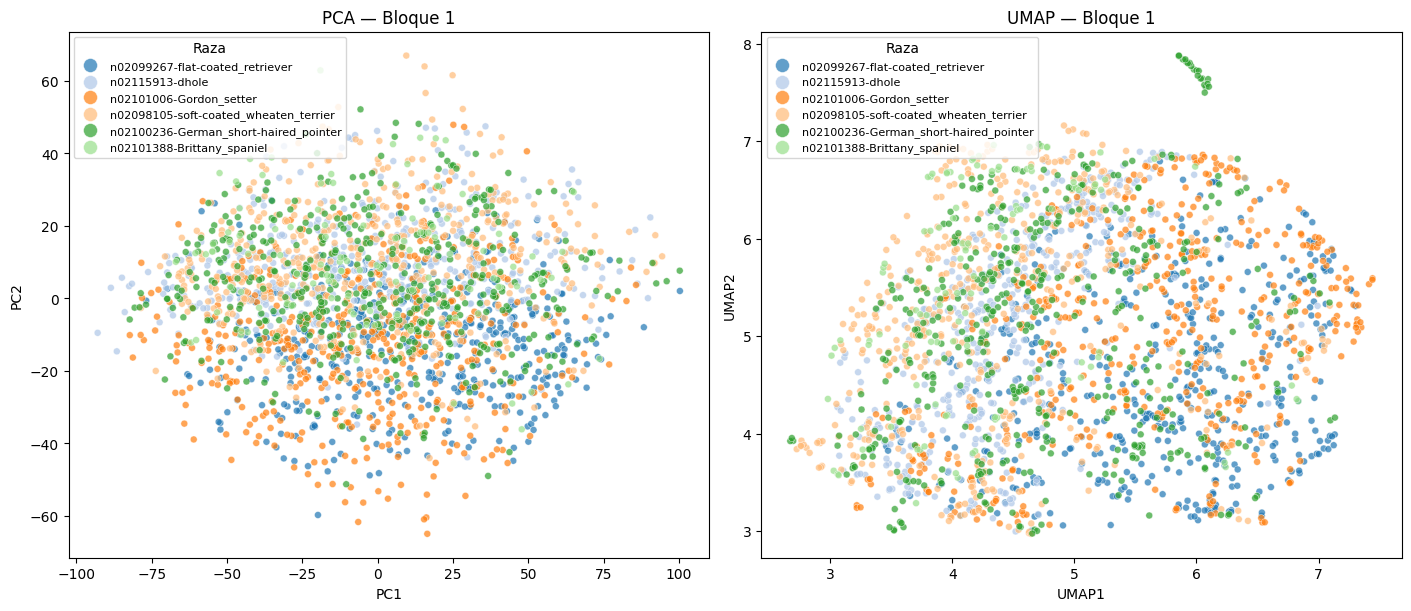

In [ ]:
# Aplanar imágenes redimensionadas
X_flat = X_block.reshape(len(X_block), -1)  # (num_imagenes, altura*ancho*3)
labels_array = np.array(augmented_labels)

# PCA
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X_flat)

# UMAP
reducer = umap.UMAP(n_components=3, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(X_flat)

# Graficar lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14,6), constrained_layout=True)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_array, palette="tab20", s=25, alpha=0.7, ax=axes[0])
axes[0].set_title("PCA — Bloque 1")
axes[0].set_xlabel("PC1"); axes[0].set_ylabel("PC2")
axes[0].legend(title="Raza", loc="best", fontsize=8, markerscale=2)

sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=labels_array, palette="tab20", s=25, alpha=0.7, ax=axes[1])
axes[1].set_title("UMAP — Bloque 1")
axes[1].set_xlabel("UMAP1"); axes[1].set_ylabel("UMAP2")
axes[1].legend(title="Raza", loc="best", fontsize=8, markerscale=2)

plt.show()


In [ ]:

import pandas as pd

# PCA DataFrame
pca_df = pd.DataFrame(data=X_pca, columns=['x', 'y', 'z'])
pca_df['label'] = labels_array

# UMAP DataFrame
umap_df = pd.DataFrame(data=X_umap, columns=['x', 'y', 'z'])
umap_df['label'] = labels_array

In [ ]:

import plotly.express as px

# PCA 3D
fig_pca = px.scatter_3d(pca_df, x='x', y='y', z='z', color='label',
                        title='PCA 3D — Bloque 1')
fig_pca.show()



In [ ]:
# UMAP 3D
fig_umap = px.scatter_3d(umap_df, x='x', y='y', z='z', color='label',
                         title='UMAP 3D — Bloque 1')
fig_umap.show()
